In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

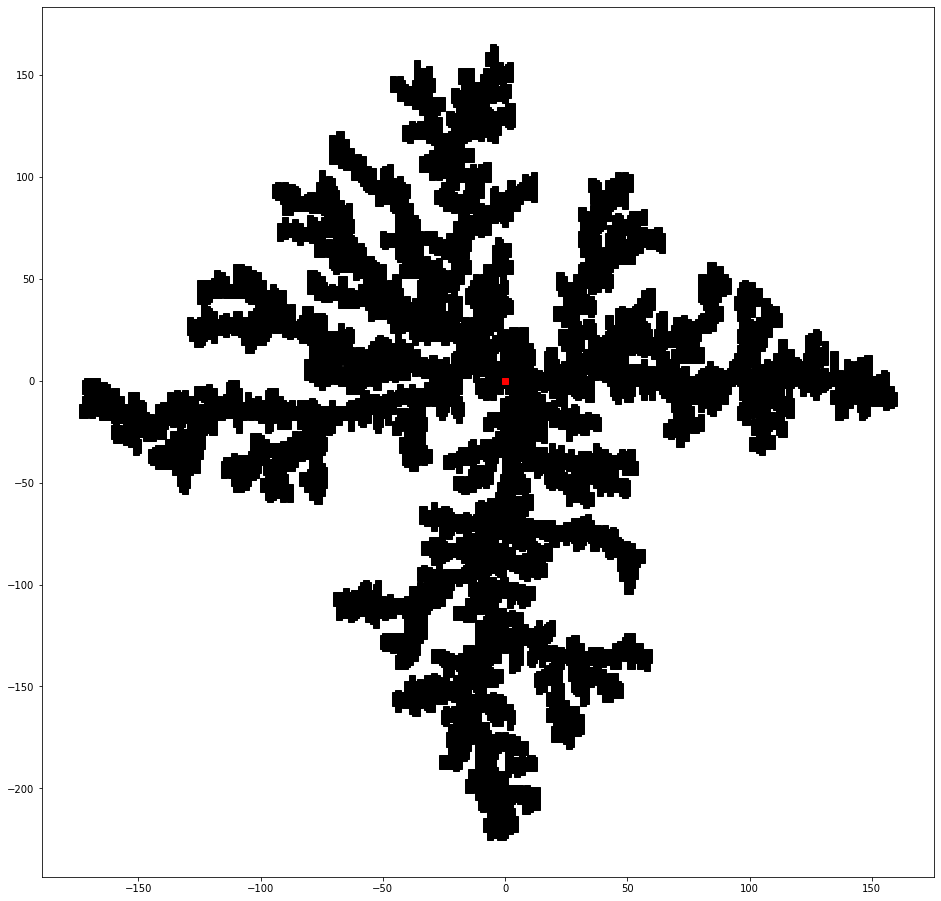

In [4]:
## Plot dla structures

x = np.zeros(10001)
z = np.zeros(10001)
z_height = 5
plt.figure(figsize= (16,16))
i = 0
with open('./files/teste2d_2.txt') as fid:
    for row in fid:
        row = row.split()
        x = int(row[2])
        z = int(row[4])
        #print(row)
        for i in range(z_height):
            plt.plot(x,z + i,'ks')
        
#plt.plot(x,z,'ks')
plt.plot(0,0,'rs')

[[1.60613868]] [1.1261397]


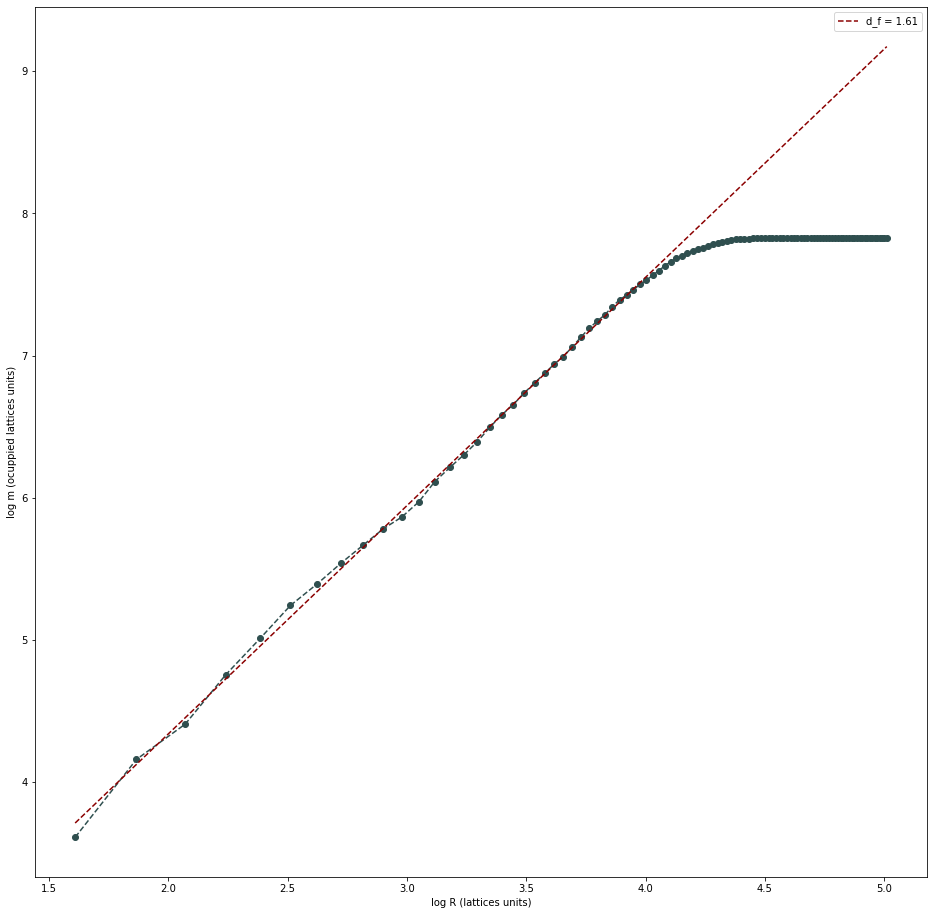

In [52]:

radius = np.linspace(5,150,n)
cont = np.zeros(n)
for j in range(0,len(radius)):
    c = 0
    for i in range(0,len(x)):
        ri = np.sqrt(((x[i]) **2) + ((z[i])**2))
        if ri <= radius[j]:
            c += 1
            cont[j] = c

#plt.plot(np.log(radius), np.log(cont))

vmin = np.log(radius[0])
vmax = np.log(radius[-1])
radius = np.log(radius).reshape(-1,1)
cont = np.log(cont).reshape(-1,1)
j, R = 0, 0
for i in range(10,len(radius)):
    reg = LinearRegression().fit(radius[:i], cont[:i])
    r2 = reg.score(radius[:i], cont[:i])
    if(r2 > R):     
        R = r2
        j = i
    #Y = reg.coef_*v[:i] + reg.intercept_
reg = LinearRegression().fit(radius[:j], cont[:j])
print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
plt.figure(figsize = (16,16))
plt.plot(radius, cont, 'o--',color='darkslategray')
plt.xlabel('log R (lattices units)')
plt.ylabel('log m (ocuppied lattices units)')
plt.plot(np.array([vmin,vmax]), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
plt.legend()